In [98]:
from math import pi
import matplotlib.pyplot as plt
from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now

In [99]:
num_qubits=2
dev=qml.device('default.qubit', wires=num_qubits)
seed = 40
np.random.seed(seed)

In [100]:
t=np.linspace(-10, 10, 40)

In [101]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x,theta):
    qml.QubitStateVector(encoded_x,wires=[i for i in range(num_qubits)])
    # qml.RY(wires=0,phi=theta[0])
    # qml.RX(wires=0,phi=theta[1])
    qml.BasicEntanglerLayers(weights=theta, wires=range(num_qubits))
    return qml.probs(wires=[0,1])
    # return qml.expval(qml.PauliZ(0))

In [102]:
def encoder(x):
    vector_x = [1,x,x**2,x**3]
    # vector_x = [1,x]
    norm_x = np.linalg.norm(vector_x)
    return vector_x/norm_x , norm_x

In [103]:

def f(x,theta,w):
    encoded_x,norm_x = encoder(x)
    f_val = hepler(encoded_x,theta)
    # rescale_coef = abs(w[0])
    rescale_coef = w[0]
    return (f_val[0]*(norm_x**2))*rescale_coef+w[1]
    # print(qml.draw(hepler)(encoded_x))

In [104]:
# f(-1.7)

In [105]:
def f_test(t):
    return 3*t**3+5*t**2+20*t-10

In [106]:
def callbackF(parameters):
    # global current_loss

    print("Current loss:", cost(parameters)) 


def cost(params):
    global theta
    global w
    # Reshape the flattened theta back to its original shape
    theta_shape = theta.shape
    w_shape = w.shape
    w, theta_flat = params[:2], params[2:]
    theta = theta_flat.reshape(theta_shape)
   
    loss = 0
    for x in t:
        loss += (f(x,theta,w)-f_test(x))**2/len(t)
    
    # print(w)
    # print(theta)
    # raise KeyError
    return loss

In [107]:
import numpy as np
from scipy.optimize import minimize

num_layers = 2

# theta = np.random.uniform(0, 2 * np.pi, size=(2,2))

shape = qml.BasicEntanglerLayers.shape(n_layers=num_layers, n_wires=num_qubits)
print(shape)
theta = np.random.random(size=shape)

w = np.zeros(2)

# initial_params = np.concatenate([w, theta.flatten()])  # Flatten theta to a 1D array
initial_params = np.concatenate([w, theta.flatten()])  # Flatten theta to a 1D array

result = minimize(cost, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})
# Extract the optimized parameters
w, theta_flat = result.x[:2], result.x[2:]
theta = theta_flat.reshape(theta.shape)

(2, 2)
Current loss: 1704527.4895575528
Current loss: 1575553.910710055
Current loss: 1498599.6493863813
Current loss: 1469949.3360258809
Current loss: 1415854.4245092191
Current loss: 1312421.0720352568
Current loss: 1156376.5377064736
Current loss: 1101592.2733989623
Current loss: 1061150.7472348986
Current loss: 995848.4716937548
Current loss: 956702.7538943209
Current loss: 909690.7817341589
Current loss: 843387.6833824373
Current loss: 743635.3951404323
Current loss: 655919.1339279558
Current loss: 628564.230073677
Current loss: 622335.5933532546
Current loss: 620100.1127651524
Current loss: 618577.288982601
Current loss: 618530.4213421769
Current loss: 618529.8409050246
Current loss: 618529.8230920548
Current loss: 618529.816364065
Current loss: 618529.7622063872
Current loss: 618529.6670252567
Current loss: 618529.4972375863
Current loss: 618529.2118457244
Current loss: 618528.8936759359
Current loss: 618528.3399325936
Current loss: 618527.4031397672
Current loss: 618526.0632889

In [108]:
print(w)

[  66.58087857 -758.72064887]


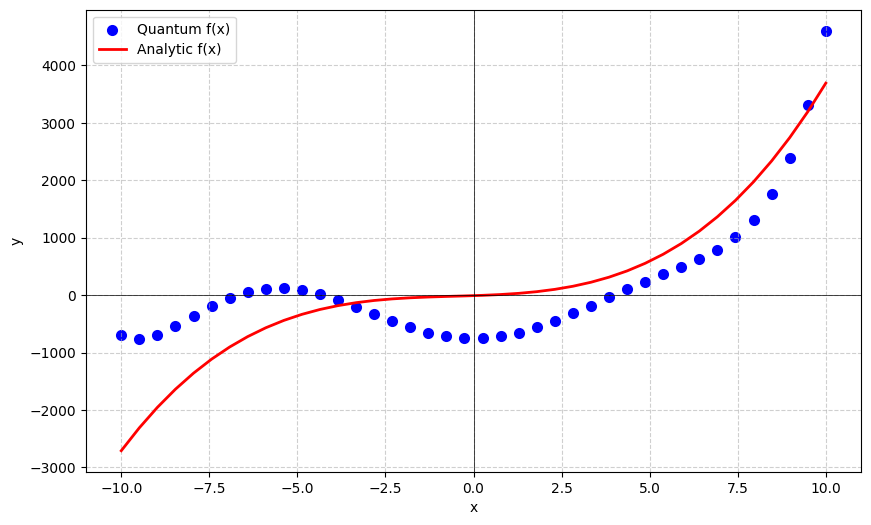

In [109]:

# Calculate corresponding y values for both functions
y1 = [f(x,theta,w) for x in t]
y2 = [f_test(x) for x in t]


# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(t, y1, label='Quantum f(x)', linewidth=2, color='b')  # Plot the first function
plt.plot(t, y2, label='Analytic f(x)', linewidth=2, color='r')  # Plot the second function
plt.xlabel('x')  # X-axis label
plt.ylabel('y')  # Y-axis label
# plt.title('Plot of Two Functions')  # Title of the plot
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid
plt.legend()  # Show the legend
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0
# plt.ylim([-5, 10])  # Set y-axis limits
